In [49]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from imblearn.over_sampling import SMOTE

In [50]:
class KNN:
    def __init__(self, k, distance_metric):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def _distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError("Unsupported distance metric")

    def predict(self, X):
        X = np.array(X)
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        x = np.array(x)
        distances = [self._distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

    def predict_proba(self, X):
        X = np.array(X)
        proba = [self._predict_proba(x) for x in X]
        return np.array(proba)

    def _predict_proba(self, x):
        x = np.array(x)
        distances = [self._distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        class_counts = np.bincount(k_nearest_labels, minlength=len(np.unique(self.y_train)))
        class_probabilities = class_counts / self.k
        return class_probabilities

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

In [51]:
data = pd.read_csv('./cs-506-predicting-customer-churn-using-knn/train.csv')
data = data.drop(columns=["id", "CustomerId", "Surname"])

features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target = 'Exited'

numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
string_features = ['Geography', 'Gender']

In [52]:
# Null value check
null_counts_features = data[features].isnull().sum()
null_counts_target = data[target].isnull().sum()

print("Null statistics - Feature columns:")
print(null_counts_features)
print("\nNull statistics - Target column:")
print(null_counts_target)

Null statistics - Feature columns:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

Null statistics - Target column:
0


In [53]:
label_counts = Counter(data['Exited'])
print("The number of each label:", label_counts)

The number of each label: Counter({0.0: 11967, 1.0: 3033})


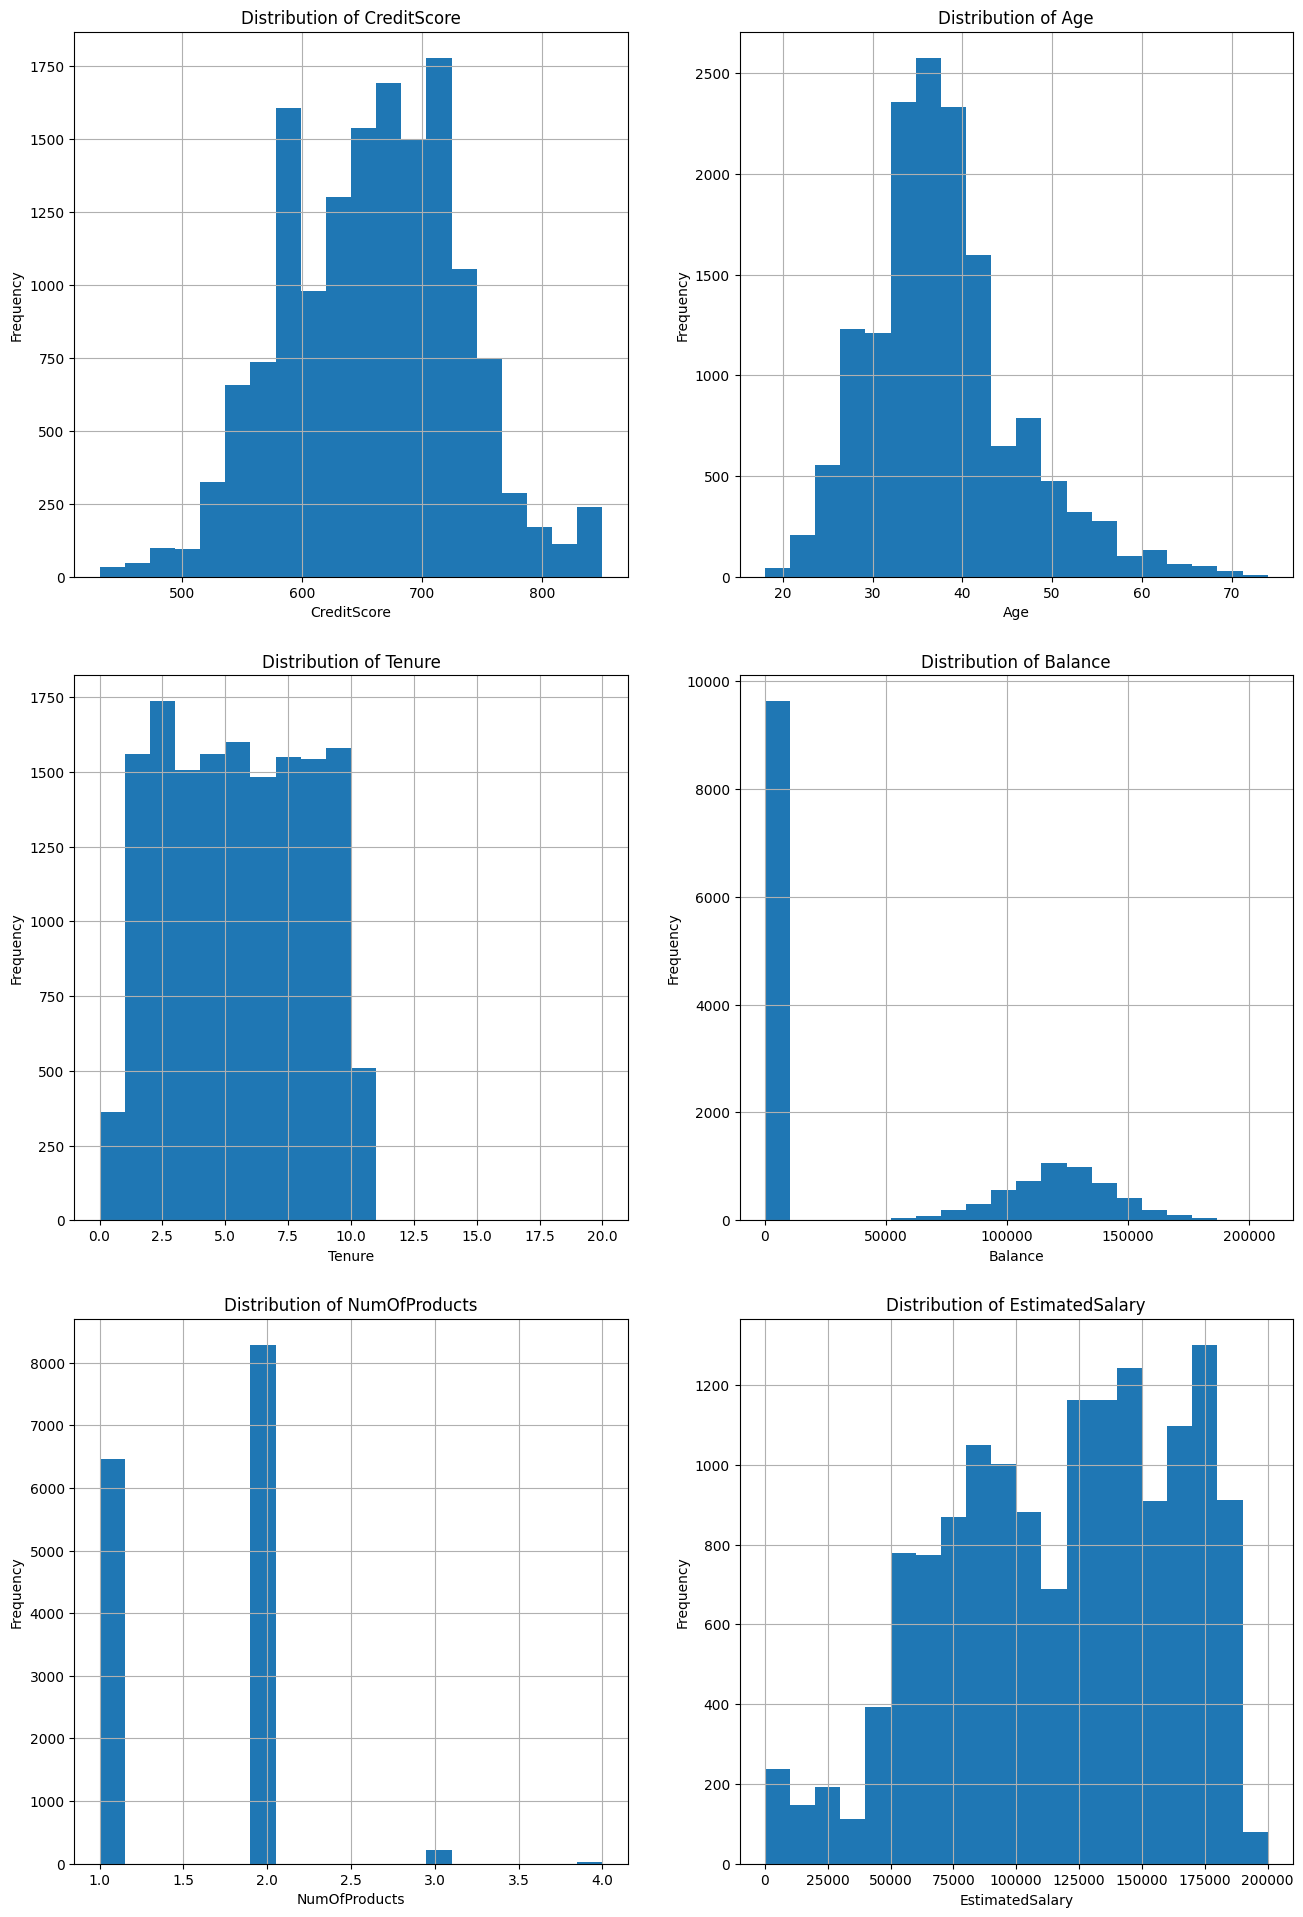

In [54]:
# Histogram of numerical distribution
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numeric_features):
    ax = axes[i//2, i%2]
    data[col].hist(bins=20, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.show()

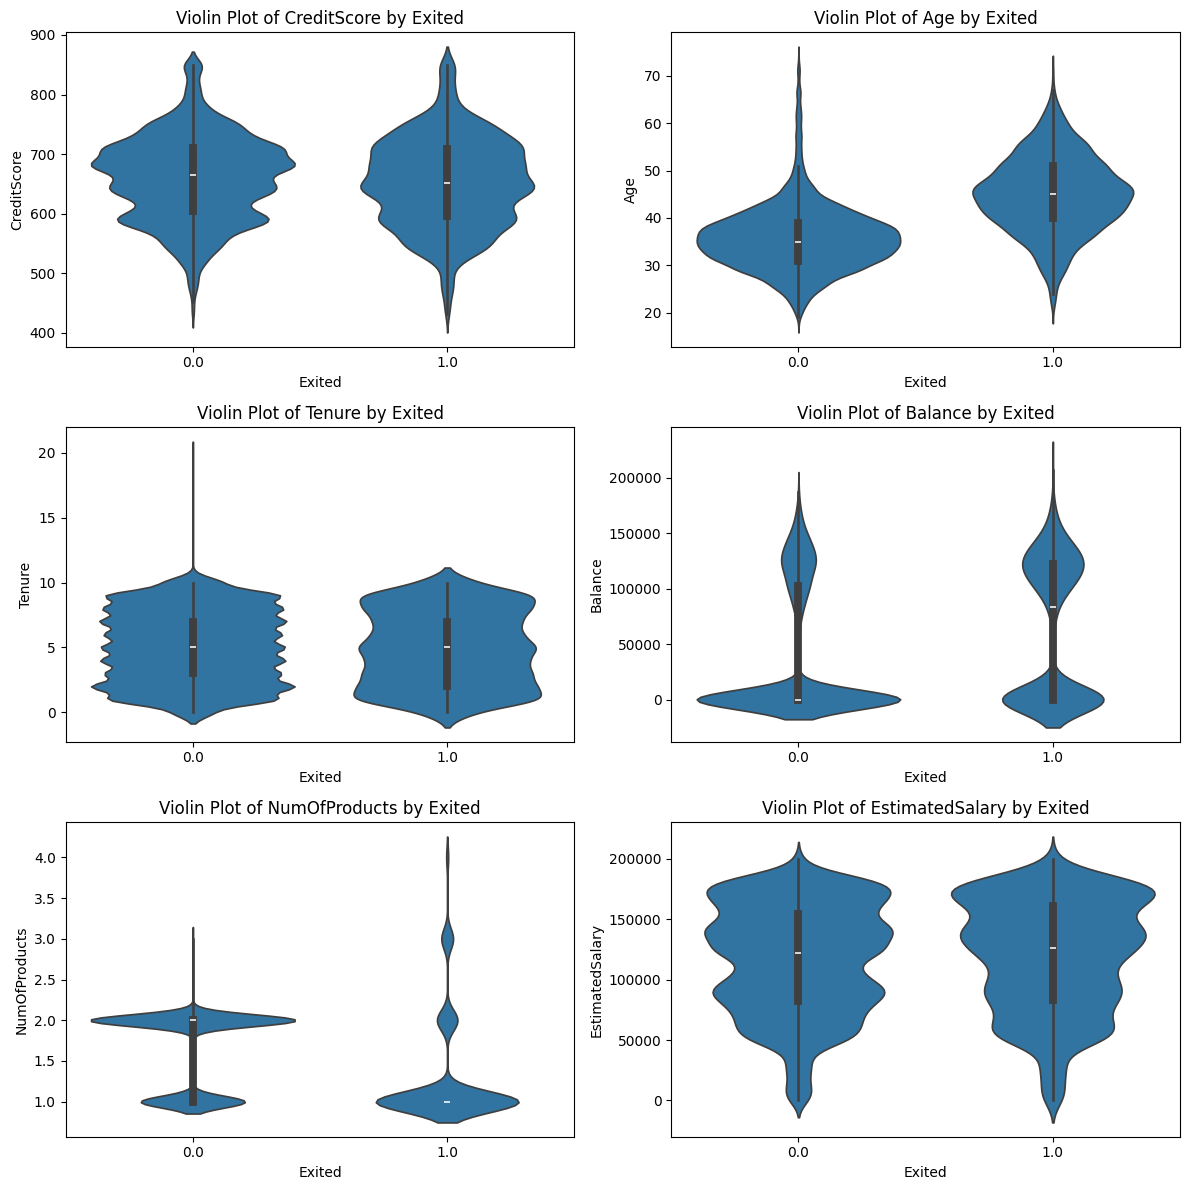

In [55]:
# Numerical Characteristic Violin Plot
plt.figure(figsize=(12, 12))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i + 1)  
    sns.violinplot(x='Exited', y=feature, data=data)
    plt.title(f'Violin Plot of {feature} by Exited')

plt.tight_layout()
plt.show()

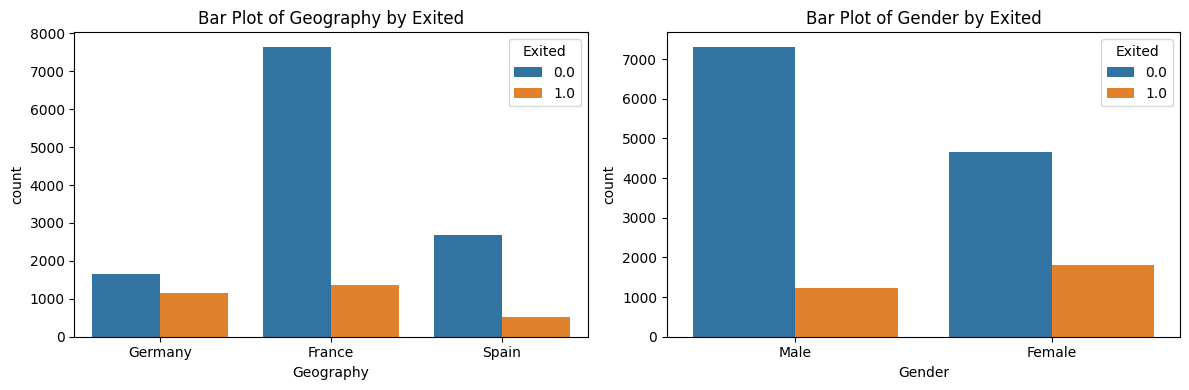

In [56]:
# String Feature Histogram
plt.figure(figsize=(12, 4))
for i, feature in enumerate(string_features):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=feature, hue='Exited', data=data)
    plt.title(f'Bar Plot of {feature} by Exited')

plt.tight_layout()
plt.show()

In [57]:
# One-Hot Encoding
geography_categories = data['Geography'].unique()
gender_categories = data['Gender'].unique()
print("Geography:", geography_categories)
print("Gender:", gender_categories)

encoded_data = pd.get_dummies(data, columns=['Geography', 'Gender'])
encoded_data

Geography: ['Germany' 'France' 'Spain']
Gender: ['Male' 'Female']


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,671.0,33.0,8.0,102994.04,1.0,1.0,1.0,176471.78,0.0,False,True,False,False,True
1,663.0,29.0,7.0,0.00,2.0,0.0,0.0,161807.17,0.0,True,False,False,False,True
2,710.0,32.0,1.0,0.00,2.0,1.0,0.0,44001.11,0.0,True,False,False,False,True
3,686.0,52.0,9.0,82596.80,1.0,0.0,0.0,125111.71,0.0,True,False,False,False,True
4,675.0,42.0,6.0,129968.67,1.0,1.0,1.0,70563.90,1.0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,607.0,39.0,6.0,0.00,2.0,1.0,0.0,38252.25,0.0,False,False,True,False,True
14996,627.0,26.0,4.0,0.00,2.0,1.0,0.0,81451.21,0.0,True,False,False,False,True
14997,610.0,54.0,9.0,0.00,2.0,0.0,1.0,123475.88,1.0,True,False,False,True,False
14998,717.0,31.0,1.0,130575.26,1.0,0.0,1.0,23861.62,0.0,False,True,False,False,True


In [58]:
# Pearson correlation coefficient
correlation_matrix = encoded_data.corr()
target_correlation = correlation_matrix['Exited'].drop('Exited')

print("Pearson correlation coefficient:")
print(target_correlation.sort_values(ascending=False))

Pearson correlation coefficient:
Age                  0.450622
Geography_Germany    0.250360
Gender_Female        0.168378
Balance              0.164444
EstimatedSalary      0.025293
HasCrCard           -0.009696
Tenure              -0.016268
CreditScore         -0.038903
Geography_Spain     -0.050206
Geography_France    -0.157289
Gender_Male         -0.168378
IsActiveMember      -0.205586
NumOfProducts       -0.289624
Name: Exited, dtype: float64


In [59]:
# T-test
features = [col for col in encoded_data.columns if col != 'Exited'] 
significant_features = []
non_significant_features = []

for feature in features:
    group1 = encoded_data[encoded_data['Exited'] == 1][feature].astype(float)
    group2 = encoded_data[encoded_data['Exited'] == 0][feature].astype(float)

    t_stat, p_value = ttest_ind(group1, group2)

    if p_value < 0.05:
        significant_features.append(feature)
    else:
        non_significant_features.append(feature)

print("\nStatistically significant features:", significant_features)
print("Non-significant features:", non_significant_features)


Statistically significant features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']
Non-significant features: ['HasCrCard']


In [60]:
def min_max_scaler(df, columns_to_scale):
    df_scaled = df.copy()  
    for column in columns_to_scale:
        min_val = df[column].min()
        max_val = df[column].max()
        
        if max_val != min_val:
            df_scaled[column] = (df[column] - min_val) / (max_val - min_val)
        else:
            df_scaled[column] = 0  
    return df_scaled


In [61]:
#Normalize
for col in encoded_data.select_dtypes(include=['bool']).columns:
    encoded_data[col] = encoded_data[col].astype(int)
features_to_scale = [col for col in encoded_data.columns if col != 'Exited']
encoded_data = min_max_scaler(encoded_data, features_to_scale)

print(encoded_data.head())

   CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0     0.572792  0.267857    0.40  0.496034       0.000000        1.0   
1     0.553699  0.196429    0.35  0.000000       0.333333        0.0   
2     0.665871  0.250000    0.05  0.000000       0.333333        1.0   
3     0.608592  0.607143    0.45  0.397798       0.000000        0.0   
4     0.582339  0.428571    0.30  0.625948       0.000000        1.0   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0             1.0         0.882385     0.0               0.0   
1             0.0         0.809055     0.0               1.0   
2             0.0         0.219969     0.0               1.0   
3             0.0         0.625560     0.0               1.0   
4             1.0         0.352795     1.0               1.0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                1.0              0.0            0.0          1.0  
1                0.0              0.0         

In [62]:
X = encoded_data.drop(columns=['Exited']).values
y = encoded_data['Exited'].values

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

resampled_label_counts = Counter(y_resampled)
print("The number of each label:", resampled_label_counts)

The number of each label: Counter({np.float64(0.0): 11967, np.float64(1.0): 11967})


In [63]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)

    label_0_indices = np.where(y == 0)[0] 
    label_1_indices = np.where(y == 1)[0] 

    np.random.shuffle(label_0_indices)
    np.random.shuffle(label_1_indices)

    test_size_0 = int(len(label_0_indices) * test_size)
    test_size_1 = int(len(label_1_indices) * test_size)

    test_indices_0 = label_0_indices[:test_size_0]
    train_indices_0 = label_0_indices[test_size_0:]

    test_indices_1 = label_1_indices[:test_size_1]
    train_indices_1 = label_1_indices[test_size_1:]

    train_indices = np.concatenate([train_indices_0, train_indices_1])
    test_indices = np.concatenate([test_indices_0, test_indices_1])

    np.random.shuffle(train_indices)
    np.random.shuffle(test_indices)

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

In [64]:
# Data Splitting
selected_features = [
    'Age', 'Geography_Germany', 'Gender_Female', 'Balance', 
    'Geography_France', 'IsActiveMember', 'NumOfProducts'
]

all_features = list(encoded_data.drop(columns=['Exited']).columns)

selected_indices = [all_features.index(feature) for feature in selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled[:, selected_indices], y_resampled, test_size=0.2)
# , random_state=42


In [65]:
def auc(fpr, tpr):
    auc = 0.0
    for i in range(1, len(fpr)):
        auc += (fpr[i] - fpr[i - 1]) * (tpr[i] + tpr[i - 1]) / 2.0
    return auc

def roc_curve(y_true, y_prob):
    thresholds = np.sort(np.unique(y_prob))[::-1] 
    tpr_list = []
    fpr_list = []
    pos_count = np.sum(y_true == 1)
    neg_count = np.sum(y_true == 0)

    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        tpr = tp / pos_count if pos_count != 0 else 0
        fpr = fp / neg_count if neg_count != 0 else 0
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return np.array(fpr_list), np.array(tpr_list)

In [66]:
# K-fold Cross Validation
def k_fold_split(X, y, cv):
    dataset_size = len(X)
    indices = np.arange(dataset_size)
    np.random.shuffle(indices)
    for k_idx in range(cv):
        test_mask = np.zeros(dataset_size, dtype=bool)
        test_mask[dataset_size * k_idx // cv:dataset_size * (k_idx + 1) // cv] = True
        train_indices = indices[~test_mask]
        test_indices = indices[test_mask]
        yield (X[train_indices], y[train_indices], X[test_indices], y[test_indices])

# def cross_validate(model, X, y, cv):
#     scores = []
#     for X_train, y_train, X_test, y_test in k_fold_split(X, y, cv):
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         accuracy = np.mean(y_pred == y_test)
#         scores.append(accuracy)
#     return scores

def cross_validate(model, X, y, cv=5):
    scores = []
    dataset_size = len(X)
    indices = np.arange(dataset_size)
    np.random.shuffle(indices)
    
    fold_size = dataset_size // cv
    
    for i in range(cv):
        test_mask = np.zeros(dataset_size, dtype=bool)
        test_mask[i * fold_size:(i + 1) * fold_size] = True
        train_indices = indices[~test_mask]
        test_indices = indices[test_mask]

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1] 

        # Calculate AUC score
        fpr, tpr = roc_curve(y_test, y_prob)
        auc_score = auc(fpr, tpr)
        scores.append(auc_score)
    
    return scores
    


In [67]:
# Training
# k_values = [10, 11, 12]
k_values = [9, 11, 13]
scores = {}
for k in k_values:
    knn = KNN(k=k, distance_metric='manhattan')
    cv_scores = cross_validate(knn, X_train, y_train, cv=5)
    print("AUC for each times:", cv_scores)
    scores[k] = np.mean(cv_scores)
    print(f"K: {k} with average AUC: {scores[k]}")

best_k = max(scores, key=scores.get)
print(f"Best K: {best_k} with average AUC: {scores[best_k]}")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23736\3151718257.py:41: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  class_counts = np.bincount(k_nearest_labels, minlength=len(np.unique(self.y_train)))


AUC for each times: [np.float64(0.9335553361991538), np.float64(0.933706903184511), np.float64(0.9317714259209238), np.float64(0.9328219318640774), np.float64(0.9355138300020189)]
K: 9 with average AUC: 0.9334738854341371
AUC for each times: [np.float64(0.934011604586169), np.float64(0.928109877745061), np.float64(0.9432705811332949), np.float64(0.9353796813912056), np.float64(0.9340840513889321)]
K: 11 with average AUC: 0.9349711592489325
AUC for each times: [np.float64(0.9305749341945091), np.float64(0.9385411210057621), np.float64(0.9378375576068301), np.float64(0.9348297454366865), np.float64(0.9324628865821811)]
K: 13 with average AUC: 0.9348492489651937
Best K: 11 with average AUC: 0.9349711592489325


In [68]:
# Predictions
best_knn = KNN(k=best_k, distance_metric='manhattan')
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23736\3151718257.py:28: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  most_common = np.bincount(k_nearest_labels).argmax()


In [69]:
# Evaluate function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    predicted_positives = np.sum(y_pred == 1)
    return true_positives / predicted_positives if predicted_positives else 0

def recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    actual_positives = np.sum(y_true == 1)
    return true_positives / actual_positives if actual_positives else 0

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) else 0

In [70]:
# Evaluation result
acc = accuracy(y_test, y_pred)
prec = precision(y_test, y_pred)
rec = recall(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")

Accuracy: 0.8646050982030924
Precision: 0.8714346530438485
Recall: 0.8554116172168825
F1 Score: 0.8633487979755378


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23736\3151718257.py:41: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  class_counts = np.bincount(k_nearest_labels, minlength=len(np.unique(self.y_train)))


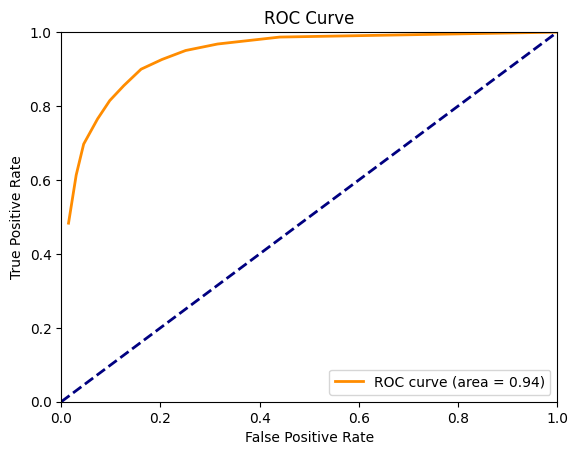

Area Under the ROC Curve (AUC): 0.9357096343650313


In [72]:
# ROC curve
y_prob = best_knn.predict_proba(X_test)[:, 1]  
fpr, tpr= roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Area Under the ROC Curve (AUC): {roc_auc}")

In [73]:
# Predict test set
test_data = pd.read_csv('./cs-506-predicting-customer-churn-using-knn/test.csv')
test_data = test_data.drop(columns=["CustomerId", "Surname"])
test_data = pd.get_dummies(test_data, columns=['Geography', 'Gender'])

for col in test_data.select_dtypes(include=['bool']).columns:
    test_data[col] = test_data[col].astype(int)

features_to_scale = [col for col in test_data[selected_features].columns if col != 'id']
test_data = min_max_scaler(test_data, features_to_scale)

X_test_selected = test_data[features_to_scale].values

y_prob = best_knn.predict_proba(X_test_selected)[:, 1]

output = pd.DataFrame({'id': test_data['id'], 'Exited': y_prob})
output.to_csv('test_predictions.csv', index=False)

print("Predicted results are saved")


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23736\3151718257.py:41: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  class_counts = np.bincount(k_nearest_labels, minlength=len(np.unique(self.y_train)))


Predicted results are saved
